In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read from csv file and inspect the data
os_historical_df = pd.read_csv("states_2022-06-27-08-sample.csv")
os_historical_df.head()

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact
0,1656316810,3571d3,37.652710,-0.899885,116.301897,264.415498,0.32512,ARP41,False,False,False,5170.0,320.04,365.76,1.656317e+09,1.656317e+09
1,1656316810,3571d1,37.921417,-0.825494,147.314343,131.035345,1.30048,ARP41,False,False,False,6716.0,3063.24,3253.74,1.656317e+09,1.656317e+09
2,1656316820,3571d3,37.654358,-0.911865,109.904552,293.445098,0.32512,ARP41,False,False,False,2036.0,312.42,365.76,1.656317e+09,1.656317e+09
3,1656316820,3571d1,37.912308,-0.812462,147.179542,131.883011,-1.30048,ARP41,False,False,False,4164.0,3070.86,3253.74,1.656317e+09,1.656317e+09
4,1656316830,3571d1,37.903577,-0.800330,146.728411,132.584489,0.97536,ARP41,False,False,False,2031.0,3070.86,3261.36,1.656317e+09,1.656317e+09


In [3]:
# Fill missing values by carrying over the previous value
os_historical_df_filled = os_historical_df.ffill()

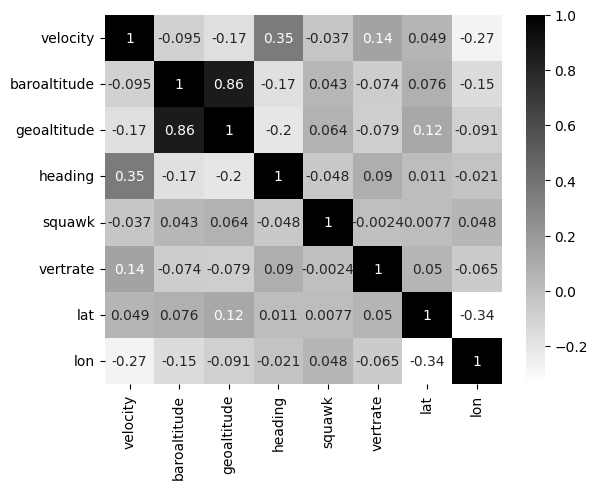

In [4]:
# Plot the correlation matrix
corr_matrix = os_historical_df_filled[["velocity", "baroaltitude", "geoaltitude", "heading", "squawk", "vertrate", "lat", "lon"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='gray_r')
plt.show()

In [5]:
# Create a copy of the dataframe and add a new column for formatted time
os_historical_df_filled_copy = os_historical_df_filled.copy()
os_historical_df_filled_copy["hms"] = pd.to_datetime(os_historical_df_filled_copy["time"], unit='s').dt.strftime('%H:%M:%S')
os_historical_df_filled_copy

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact,hms
0,1656316810,3571d3,37.652710,-0.899885,116.301897,264.415498,0.32512,ARP41,False,False,False,5170.0,320.04,365.76,1.656317e+09,1.656317e+09,08:00:10
1,1656316810,3571d1,37.921417,-0.825494,147.314343,131.035345,1.30048,ARP41,False,False,False,6716.0,3063.24,3253.74,1.656317e+09,1.656317e+09,08:00:10
2,1656316820,3571d3,37.654358,-0.911865,109.904552,293.445098,0.32512,ARP41,False,False,False,2036.0,312.42,365.76,1.656317e+09,1.656317e+09,08:00:20
3,1656316820,3571d1,37.912308,-0.812462,147.179542,131.883011,-1.30048,ARP41,False,False,False,4164.0,3070.86,3253.74,1.656317e+09,1.656317e+09,08:00:20
4,1656316830,3571d1,37.903577,-0.800330,146.728411,132.584489,0.97536,ARP41,False,False,False,2031.0,3070.86,3261.36,1.656317e+09,1.656317e+09,08:00:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,1656318670,3571d1,37.782154,-0.803419,61.477672,45.339024,-4.22656,ARP41,True,False,False,4473.0,9730.74,9730.74,1.656318e+09,1.656318e+09,08:31:10
389,1656318670,4a7c26,45.426968,25.485110,61.477672,45.339024,-4.22656,ARP41,True,False,False,4473.0,9730.74,9730.74,1.656319e+09,1.656319e+09,08:31:10
390,1656318680,3571d1,37.782154,-0.803419,61.477672,45.339024,-4.22656,ARP41,True,False,False,5527.0,10972.80,11544.30,1.656318e+09,1.656318e+09,08:31:20
391,1656318690,3571d1,37.782154,-0.803419,61.477672,45.339024,-4.22656,ARP41,True,False,False,3133.0,4000.50,4168.14,1.656318e+09,1.656318e+09,08:31:30


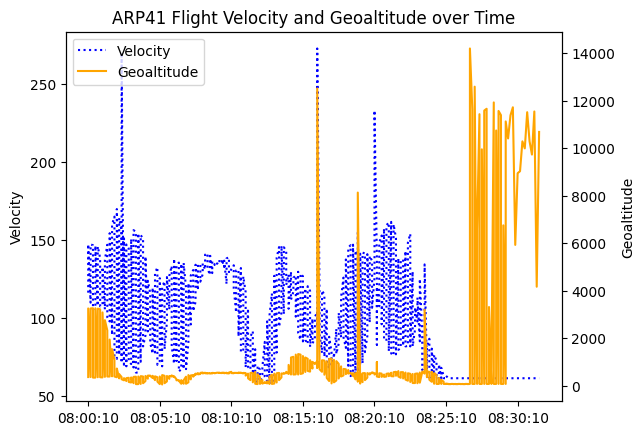

In [6]:
fig, ax1 = plt.subplots()
ax1.set_title("ARP41 Flight Velocity and Geoaltitude over Time")
ax1.set_xticks(range(0, len(os_historical_df_filled_copy), 30))
ax1.set_ylabel("Velocity")
ln1 = ax1.plot(os_historical_df_filled_copy["hms"], os_historical_df_filled_copy["velocity"], linestyle=":", color='blue', label="Velocity")
ax2 = ax1.twinx()
ax2.set_ylabel("Geoaltitude")
ln2 = ax2.plot(os_historical_df_filled_copy["hms"], os_historical_df_filled_copy["geoaltitude"], color='orange', label="Geoaltitude")
lns = ln1 + ln2
labels = [l.get_label() for l in lns]
plt.legend(lns, labels)